# Desafio 1 - Maratona Behind the Code 2021

### Notebook guia

Esse Jupyter Notebook te dará instruções para criar uma solução introdutória para o desafio 1 da Maratona. Sinta-se livre para editar e melhorar sua solução!


## Exploração do dataset

O primeiro passo para o desenvolvimento de um bom modelo de Machine Learning é explorar bem os dados que temos para trabalhar. Devemos entender o melhor possível a relevância de cada dado para o valor que queremos predizer. Afinal, a predição do modelo é inteiramente baseada nos dados com que treinou.

Existem muitas bibliotecas em Python que podem ser utilizadas para tratamento e visualização de dados. Nesses exemplos, vamos usar Pandas, Seaborn e Matplotlib.

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [194]:
# Carregue aqui o dataset
loans = pd.read_csv("..\data\loans.csv")
demogra = pd.read_csv("..\data\Demographics.csv")
accounts = pd.read_csv("..\data\Accounts.csv")
result = pd.read_csv("..\data\ANSWERS.csv")

Podemos usar os métodos `.info()` e `.describe()` para obter informações básicas sobre quantidade presente dos dados, tipos e valores deles.

In [195]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3999 non-null   int64  
 1   PAYMENT_TERM         3975 non-null   float64
 2   INSTALLMENT_PLANS    3978 non-null   object 
 3   INSTALLMENT_PERCENT  3974 non-null   float64
 4   LOAN_PURPOSE         3979 non-null   object 
 5   LOAN_AMOUNT          3981 non-null   float64
 6   OTHERS_ON_LOAN       3977 non-null   object 
 7   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 250.1+ KB


In [196]:
loans.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000


A variável destino para este desafio é a `ALLOW`, significando se um empréstimo deverá ser permitido ou não, baseado nas informações dadas. Vamos dar uma olhada em como está a distribuição dessa variável

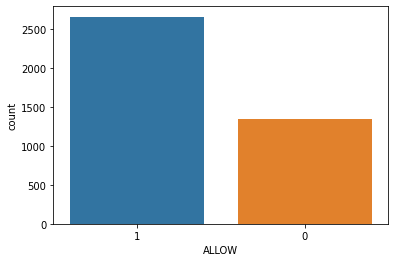

In [197]:
risk_plot = sns.countplot(data=loans, x='ALLOW', order=loans['ALLOW'].value_counts().index)
plt.show()

Sinta-se livre para ver a distribuição de outras colunas do conjunto de dados, utilizar os outros conjuntos de dados, explorar as correlações entre variáveis e outros.

In [198]:
# Adicione suas explorações

In [199]:
lo_de = loans.merge(demogra)

In [201]:
lo_de_ac = lo_de.merge(accounts, on='ID', how='left')

In [202]:
lo_de_ac.count()

ID                            3936
PAYMENT_TERM                  3912
INSTALLMENT_PLANS             3915
INSTALLMENT_PERCENT           3911
LOAN_PURPOSE                  3917
LOAN_AMOUNT                   3918
OTHERS_ON_LOAN                3914
ALLOW                         3936
SEX                           3920
AGE                           3918
JOB_TYPE                      3910
DEPENDENTS                    3915
TELEPHONE                     3915
FOREIGN_WORKER                3909
EMPLOYMENT_DURATION           3923
PROPERTY                      3918
HOUSING                       3912
CURRENT_RESIDENCE_DURATION    3917
CHECKING_BALANCE              2467
CREDIT_HISTORY                2462
EXISTING_SAVINGS              2467
EXISTING_CREDITS_COUNT        2463
dtype: int64

## Tratamento dos dados

In [203]:
clean_df = lo_de_ac.copy()

In [216]:
clean_df['PAYMENT_TERM_n'] = clean_df.PAYMENT_TERM.fillna(clean_df.PAYMENT_TERM.mean())
clean_df['INSTALLMENT_PLANS_n'] = clean_df.INSTALLMENT_PLANS.fillna("NONE")
clean_df['INSTALLMENT_PERCENT_n'] = clean_df.INSTALLMENT_PERCENT.fillna(clean_df.INSTALLMENT_PERCENT.median())
clean_df['LOAN_PURPOSE_n'] = clean_df.LOAN_PURPOSE.fillna("NONE")
clean_df['LOAN_AMOUNT_n'] = clean_df.LOAN_AMOUNT.fillna(clean_df.LOAN_AMOUNT.median())
clean_df['OTHERS_ON_LOAN_n'] = clean_df.OTHERS_ON_LOAN.fillna("NONE")
clean_df.dropna(subset=['SEX'], inplace=True)
clean_df['AGE_n'] = clean_df.AGE.fillna(clean_df.AGE.mean())
clean_df['JOB_TYPE_n'] = clean_df.JOB_TYPE.fillna(clean_df.JOB_TYPE.median())
clean_df['DEPENDENTS_n'] = clean_df.DEPENDENTS.fillna("0").astype('int64')
clean_df['TELEPHONE_n'] = clean_df.TELEPHONE.fillna("0").astype('int64')
clean_df['FOREIGN_WORKER_n'] = clean_df.FOREIGN_WORKER.fillna("0").astype('int64')
clean_df['EMPLOYMENT_DURATION_n'] = clean_df.EMPLOYMENT_DURATION.fillna("0").astype('int64')
clean_df['PROPERTY_n'] = clean_df.PROPERTY.fillna("UNKNOWN")
clean_df['HOUSING_n'] = clean_df.HOUSING.fillna("UNKNOWN")
clean_df['CURRENT_RESIDENCE_DURATION_n'] = clean_df.CURRENT_RESIDENCE_DURATION.fillna(clean_df.CURRENT_RESIDENCE_DURATION.mean())

In [217]:
clean_df['CHECKING_BALANCE_n'] = clean_df.CHECKING_BALANCE.apply(lambda x: 0 if x == 'NO_CHECKING' else x )
clean_df['CHECKING_BALANCE_n'] = clean_df.CHECKING_BALANCE_n.fillna(clean_df.CHECKING_BALANCE_n.astype('float').mean())
clean_df['CHECKING_BALANCE_n2'] = clean_df.CHECKING_BALANCE_n.astype('float')
clean_df['CREDIT_HISTORY_n'] = clean_df.CREDIT_HISTORY.fillna("UNKNOWN")
clean_df['EXISTING_SAVINGS_n'] = clean_df.EXISTING_SAVINGS.apply(lambda x: -1 if x == 'UNKNOWN' else x )
clean_df['EXISTING_SAVINGS_n'] = clean_df.EXISTING_SAVINGS_n.fillna(-1).astype('float')
clean_df['EXISTING_CREDITS_COUNT_n'] = clean_df.EXISTING_CREDITS_COUNT.fillna(-1).astype('float')

In [218]:
object_columns = ['PAYMENT_TERM','INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
       'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE','CHECKING_BALANCE_n','CREDIT_HISTORY','EXISTING_SAVINGS',
       'EXISTING_CREDITS_COUNT']
clean_df = clean_df.drop(object_columns, axis=1)
clean_df = clean_df.drop('ID', axis=1)

In [147]:
clean_df.columns

Index(['SEX', 'ALLOW', 'PAYMENT_TERM_n', 'INSTALLMENT_PLANS_n',
       'INSTALLMENT_PERCENT_n', 'LOAN_PURPOSE_n', 'LOAN_AMOUNT_n',
       'OTHERS_ON_LOAN_n', 'AGE_n', 'JOB_TYPE_n', 'DEPENDENTS_n',
       'TELEPHONE_n', 'FOREIGN_WORKER_n', 'EMPLOYMENT_DURATION_n',
       'PROPERTY_n', 'HOUSING_n', 'CURRENT_RESIDENCE_DURATION_n',
       'CHECKING_BALANCE_n2', 'CREDIT_HISTORY_n', 'EXISTING_SAVINGS_n',
       'EXISTING_CREDITS_COUNT_n'],
      dtype='object')

### Usando One-Hot Encoding

In [219]:
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
temp_n = pd.get_dummies(clean_df, columns=['INSTALLMENT_PLANS_n', 'SEX',
    'LOAN_PURPOSE_n','OTHERS_ON_LOAN_n','PROPERTY_n','HOUSING_n','CREDIT_HISTORY_n'])

In [170]:
temp_n.isnull().sum()

ALLOW                                      0
PAYMENT_TERM_n                             0
INSTALLMENT_PERCENT_n                      0
LOAN_AMOUNT_n                              0
AGE_n                                      0
JOB_TYPE_n                                 0
DEPENDENTS_n                               0
TELEPHONE_n                                0
FOREIGN_WORKER_n                           0
EMPLOYMENT_DURATION_n                      0
CURRENT_RESIDENCE_DURATION_n               0
CHECKING_BALANCE_n2                        0
EXISTING_SAVINGS_n                         0
EXISTING_CREDITS_COUNT_n                   0
INSTALLMENT_PLANS_n_BANK                   0
INSTALLMENT_PLANS_n_NONE                   0
INSTALLMENT_PLANS_n_STORES                 0
SEX_F                                      0
SEX_M                                      0
LOAN_PURPOSE_n_APPLIANCES                  0
LOAN_PURPOSE_n_BUSINESS                    0
LOAN_PURPOSE_n_CAR_NEW                     0
LOAN_PURPO

### Feature selection

In [179]:
Y_train = y_train.copy()
Y_test = y_test.copy()

In [180]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=17, step=1)
rfe = rfe.fit(X_train, Y_train)
print('Chosen best features by rfe:',X_train.columns[rfe.support_])

Chosen best features by rfe: Index(['PAYMENT_TERM_n', 'INSTALLMENT_PERCENT_n', 'LOAN_AMOUNT_n', 'SEX_M',
       'AGE_n', 'JOB_TYPE_n', 'TELEPHONE_n', 'EMPLOYMENT_DURATION_n',
       'CURRENT_RESIDENCE_DURATION_n', 'CHECKING_BALANCE_n2',
       'EXISTING_SAVINGS_n', 'EXISTING_CREDITS_COUNT_n',
       'OTHERS_ON_LOAN_n_NONE', 'PROPERTY_n_CAR_OTHER',
       'PROPERTY_n_REAL_ESTATE', 'PROPERTY_n_SAVINGS_INSURANCE',
       'HOUSING_n_OWN'],
      dtype='object')


Accuracy is:  0.7899659863945578


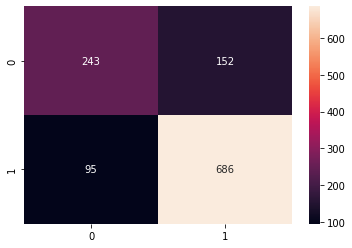

In [181]:
xtrain_5features = X_train[X_train.columns[rfe.support_]]
X_test_5features = X_test[X_train.columns[rfe.support_]]
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(xtrain_5features,Y_train)
ac = accuracy_score(Y_test,clf_rf.predict(X_test_5features))
print('Accuracy is: ',ac)
cm = confusion_matrix(Y_test,clf_rf.predict(X_test_5features))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [182]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, Y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

C:\Users\a362014\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


Optimal number of features : 32
Best features : Index(['PAYMENT_TERM_n', 'INSTALLMENT_PERCENT_n', 'LOAN_AMOUNT_n', 'SEX_F',
       'SEX_M', 'AGE_n', 'JOB_TYPE_n', 'DEPENDENTS_n', 'TELEPHONE_n',
       'EMPLOYMENT_DURATION_n', 'CURRENT_RESIDENCE_DURATION_n',
       'CHECKING_BALANCE_n2', 'EXISTING_SAVINGS_n', 'EXISTING_CREDITS_COUNT_n',
       'INSTALLMENT_PLANS_n_BANK', 'INSTALLMENT_PLANS_n_NONE',
       'INSTALLMENT_PLANS_n_STORES', 'LOAN_PURPOSE_n_APPLIANCES',
       'LOAN_PURPOSE_n_CAR_NEW', 'LOAN_PURPOSE_n_CAR_USED',
       'LOAN_PURPOSE_n_FURNITURE', 'LOAN_PURPOSE_n_RADIO_TV',
       'OTHERS_ON_LOAN_n_NONE', 'PROPERTY_n_CAR_OTHER',
       'PROPERTY_n_REAL_ESTATE', 'PROPERTY_n_SAVINGS_INSURANCE',
       'PROPERTY_n_UNKNOWN', 'HOUSING_n_FREE', 'HOUSING_n_OWN',
       'HOUSING_n_RENT', 'CREDIT_HISTORY_n_CREDITS_PAID_TO_DATE',
       'CREDIT_HISTORY_n_PRIOR_PAYMENTS_DELAYED'],
      dtype='object')


C:\Users\a362014\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


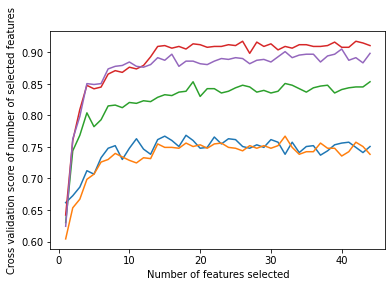

In [183]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [184]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,Y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5 (0.100215)
2. feature 11 (0.097144)
3. feature 0 (0.092621)
4. feature 2 (0.089245)
5. feature 10 (0.077441)
6. feature 1 (0.055099)
7. feature 33 (0.041279)
8. feature 13 (0.038139)
9. feature 31 (0.035715)
10. feature 12 (0.033498)
11. feature 34 (0.031163)
12. feature 14 (0.025835)
13. feature 6 (0.023270)
14. feature 4 (0.021966)
15. feature 37 (0.019691)
16. feature 38 (0.016547)
17. feature 8 (0.016525)
18. feature 32 (0.016096)
19. feature 3 (0.013248)
20. feature 17 (0.011260)
21. feature 21 (0.010876)
22. feature 23 (0.010469)
23. feature 25 (0.009517)
24. feature 35 (0.009440)
25. feature 40 (0.009392)
26. feature 20 (0.009277)
27. feature 43 (0.008396)
28. feature 16 (0.008371)
29. feature 7 (0.008188)
30. feature 18 (0.006849)
31. feature 36 (0.006527)
32. feature 15 (0.006374)
33. feature 29 (0.005661)
34. feature 42 (0.005520)
35. feature 19 (0.005014)
36. feature 39 (0.004108)
37. feature 26 (0.003971)
38. feature 27 (0.003479)
39. feature 2

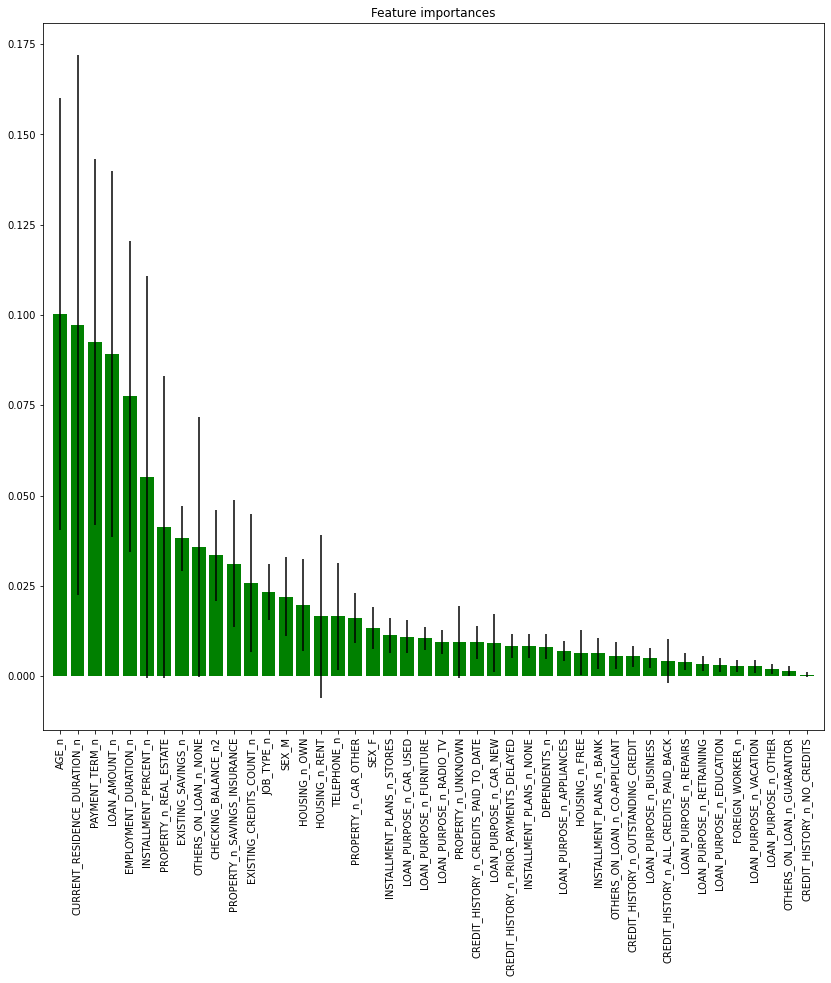

In [185]:
# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],  color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Text(0, 0.5, 'Variance Ratio Explained')

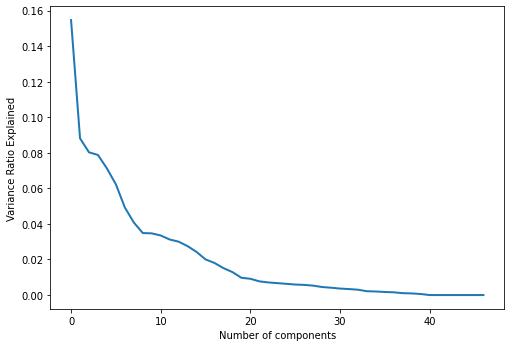

In [87]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)
plt.figure(1, figsize=(9, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Variance Ratio Explained')

## Criação do modelo

Com os dados prontos, podemos selecionar um modelo de Machine Learning para treinar com nossos dados. Nesse exemplo, vamos utilizar um modelo de classificação básico, o de Árvore de Decisão.

Para conseguir avaliar o desempenho do nosso modelo, vamos dividir os dados que temos entre dados de treino e de teste, e assim, após o treinamento, verificar como ele está se saindo com as predições.

In [220]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [221]:
# Original
# features = ['PAYMENT_TERM_n', 'INSTALLMENT_PERCENT_n', 'LOAN_AMOUNT_n','SEX_F','SEX_M',
#        'AGE_n', 'JOB_TYPE_n', 'DEPENDENTS_n', 'TELEPHONE_n',
#        'FOREIGN_WORKER_n', 'EMPLOYMENT_DURATION_n',
#        'CURRENT_RESIDENCE_DURATION_n', 'CHECKING_BALANCE_n2',
#        'EXISTING_SAVINGS_n', 'EXISTING_CREDITS_COUNT_n',
#        'INSTALLMENT_PLANS_n_BANK', 'INSTALLMENT_PLANS_n_NONE',
#        'INSTALLMENT_PLANS_n_STORES', 'LOAN_PURPOSE_n_APPLIANCES',
#        'LOAN_PURPOSE_n_BUSINESS', 'LOAN_PURPOSE_n_CAR_NEW',
#        'LOAN_PURPOSE_n_CAR_USED', 'LOAN_PURPOSE_n_EDUCATION',
#        'LOAN_PURPOSE_n_FURNITURE', 'LOAN_PURPOSE_n_NONE',
#        'LOAN_PURPOSE_n_OTHER', 'LOAN_PURPOSE_n_RADIO_TV',
#        'LOAN_PURPOSE_n_REPAIRS', 'LOAN_PURPOSE_n_RETRAINING',
#        'LOAN_PURPOSE_n_VACATION', 'OTHERS_ON_LOAN_n_CO-APPLICANT',
#        'OTHERS_ON_LOAN_n_GUARANTOR', 'OTHERS_ON_LOAN_n_NONE',
#        'PROPERTY_n_CAR_OTHER', 'PROPERTY_n_REAL_ESTATE',
#        'PROPERTY_n_SAVINGS_INSURANCE', 'PROPERTY_n_UNKNOWN', 'HOUSING_n_FREE',
#        'HOUSING_n_OWN', 'HOUSING_n_RENT', 'HOUSING_n_UNKNOWN',
#        'CREDIT_HISTORY_n_ALL_CREDITS_PAID_BACK',
#        'CREDIT_HISTORY_n_CREDITS_PAID_TO_DATE', 'CREDIT_HISTORY_n_NO_CREDITS',
#        'CREDIT_HISTORY_n_OUTSTANDING_CREDIT',
#        'CREDIT_HISTORY_n_PRIOR_PAYMENTS_DELAYED', 'CREDIT_HISTORY_n_UNKNOWN']

# 2o
# features = ['PAYMENT_TERM_n', 'INSTALLMENT_PERCENT_n', 'LOAN_AMOUNT_n','SEX_F','SEX_M',
#        'AGE_n', 'JOB_TYPE_n', 'DEPENDENTS_n', 'TELEPHONE_n',
#        'FOREIGN_WORKER_n', 'EMPLOYMENT_DURATION_n',
#        'CURRENT_RESIDENCE_DURATION_n', 'CHECKING_BALANCE_n2',
#        'EXISTING_SAVINGS_n', 'EXISTING_CREDITS_COUNT_n',
#        'INSTALLMENT_PLANS_n_BANK', 'INSTALLMENT_PLANS_n_NONE',
#        'INSTALLMENT_PLANS_n_STORES', 'LOAN_PURPOSE_n_APPLIANCES',
#        'LOAN_PURPOSE_n_BUSINESS', 'LOAN_PURPOSE_n_CAR_NEW',
#        'LOAN_PURPOSE_n_CAR_USED', 'LOAN_PURPOSE_n_EDUCATION',
#        'LOAN_PURPOSE_n_FURNITURE', 
#        'LOAN_PURPOSE_n_OTHER', 'LOAN_PURPOSE_n_RADIO_TV',
#        'LOAN_PURPOSE_n_REPAIRS', 'LOAN_PURPOSE_n_RETRAINING',
#        'LOAN_PURPOSE_n_VACATION', 'OTHERS_ON_LOAN_n_CO-APPLICANT',
#        'OTHERS_ON_LOAN_n_GUARANTOR', 'OTHERS_ON_LOAN_n_NONE',
#        'PROPERTY_n_CAR_OTHER', 'PROPERTY_n_REAL_ESTATE',
#        'PROPERTY_n_SAVINGS_INSURANCE', 'PROPERTY_n_UNKNOWN', 'HOUSING_n_FREE',
#        'HOUSING_n_OWN', 'HOUSING_n_RENT', 
#        'CREDIT_HISTORY_n_ALL_CREDITS_PAID_BACK',
#        'CREDIT_HISTORY_n_CREDITS_PAID_TO_DATE', 'CREDIT_HISTORY_n_NO_CREDITS',
#        'CREDIT_HISTORY_n_OUTSTANDING_CREDIT',
#        'CREDIT_HISTORY_n_PRIOR_PAYMENTS_DELAYED']


features = ['PAYMENT_TERM_n', 'INSTALLMENT_PERCENT_n', 'LOAN_AMOUNT_n','SEX_F','SEX_M',
       'AGE_n', 'JOB_TYPE_n', 'DEPENDENTS_n', 'TELEPHONE_n',
       'EMPLOYMENT_DURATION_n',
       'CURRENT_RESIDENCE_DURATION_n', 'CHECKING_BALANCE_n2',
       'EXISTING_SAVINGS_n', 'EXISTING_CREDITS_COUNT_n',
       'INSTALLMENT_PLANS_n_BANK', 'INSTALLMENT_PLANS_n_NONE',
       'INSTALLMENT_PLANS_n_STORES', 'LOAN_PURPOSE_n_APPLIANCES',
       'LOAN_PURPOSE_n_BUSINESS', 'LOAN_PURPOSE_n_CAR_NEW',
       'LOAN_PURPOSE_n_CAR_USED', 'LOAN_PURPOSE_n_EDUCATION',
       'LOAN_PURPOSE_n_FURNITURE', 
       'LOAN_PURPOSE_n_RADIO_TV',
       'LOAN_PURPOSE_n_REPAIRS', 'LOAN_PURPOSE_n_RETRAINING',
       'OTHERS_ON_LOAN_n_CO-APPLICANT',
       'OTHERS_ON_LOAN_n_NONE',
       'PROPERTY_n_CAR_OTHER', 'PROPERTY_n_REAL_ESTATE',
       'PROPERTY_n_SAVINGS_INSURANCE', 'PROPERTY_n_UNKNOWN', 'HOUSING_n_FREE',
       'HOUSING_n_OWN', 'HOUSING_n_RENT', 
       'CREDIT_HISTORY_n_ALL_CREDITS_PAID_BACK',
       'CREDIT_HISTORY_n_CREDITS_PAID_TO_DATE', 
       'CREDIT_HISTORY_n_OUTSTANDING_CREDIT',
       'CREDIT_HISTORY_n_PRIOR_PAYMENTS_DELAYED']

target = ['ALLOW']

# X = clean_df[features]
# y = clean_df[target]
X = temp_n[features]
y = temp_n[target]


In [222]:
y = np.ravel(y)

In [212]:
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, random_state=42, stratify=y)

In [213]:
from imblearn.over_sampling import SMOTE as Smote
smt = Smote(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [214]:
model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='auto',
                            random_state=42, n_jobs=11, criterion='entropy', max_depth=22)

# model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, max_features="log2",
#                             random_state=42, n_jobs=11, criterion='entropy')

# model = LogisticRegression(solver='lbfgs', max_iter=4000)

# model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.7959183673469388


In [191]:
from sklearn.model_selection import cross_val_score
acc_cv = cross_val_score(model,X_train, y_train,cv=10)
print(f"Acurácia do modelo (com cross validate): {acc_cv.mean()}")

# np.sqrt(mean_squared_error(y_test, y_pred))

Acurácia do modelo (com cross validate): 0.837488333584224


Accuracy score = 0.7959183673469388
Mean absolute error = 0.20408163265306123


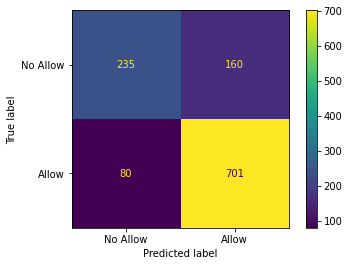

              precision    recall  f1-score   support

    No Allow       0.75      0.59      0.66       395
       Allow       0.81      0.90      0.85       781

    accuracy                           0.80      1176
   macro avg       0.78      0.75      0.76      1176
weighted avg       0.79      0.80      0.79      1176



In [192]:
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test, predictions)}')
print(f'Mean absolute error = {mean_absolute_error(y_test, predictions)}')

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ['No Allow', 'Allow']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_test, predictions, target_names=labels))

# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["No Allow", "Allow"])

### Geração do resultado
É preciso rodar tudo de novo, trocando:
clean_df = result.copy()

In [ ]:
y_result = model.predict(X)
np.bincount(y_result)
final = result.copy()
final['ALLOW'] = y_result
final.to_csv('final.csv', index=False)